Importar Librerias

In [11]:
import pandas as pd   
import matplotlib.pyplot as plt 
import seaborn as sns  
import numpy as np 
from sklearn.preprocessing import StandardScaler
from scipy.stats import jarque_bera
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from statsmodels.formula.api import rlm

3. Considere el conjunto de datos “Wine Quality” del fichero datos.xls. Defina como variable
respuesta (Y) la columna Densidad y elimine las variables pH, Sulfatos, Cloruros, Acidez
Volátil, Acidez Fija y Calidad de Vino.

In [8]:
#Carga de base de datos y definicion de variables objetivo y predictoras
path= "datos/datos.xls"
df = pd.read_excel(path, sheet_name= 'Wine Quality', header=2)[['Densidad', 'Alcohol', 'Dióxido de Azúfre Total', 'Dióxido de Azúfre Libre', 'Azúcar Residual', 'Ácido Cítrico']]
df.head(5)

,Densidad,Alcohol,Dióxido de Azúfre Total,Dióxido de Azúfre Libre,Azúcar Residual,Ácido Cítrico
0,1.0010,8.8,170.0,45.0,20.7,0.36
1,0.9940,9.5,132.0,14.0,1.6,0.34
2,0.9951,10.1,97.0,30.0,6.9,0.40
3,0.9956,9.9,186.0,47.0,8.5,0.32
4,0.9956,9.9,186.0,47.0,8.5,0.32


In [10]:
missing_data = df[df.isnull().any(axis=1)]
print("\nCantidad total de filas con datos faltantes:", missing_data.shape[0])


Cantidad total de filas con datos faltantes: 0


<h4>Estandarice las variables, calcule las matrices de correlación de Pearson, Kendall y Spearman y compárelas ¿Qué diferencia encuentra entre las estructuras de dependencias obtenidas?</h4>

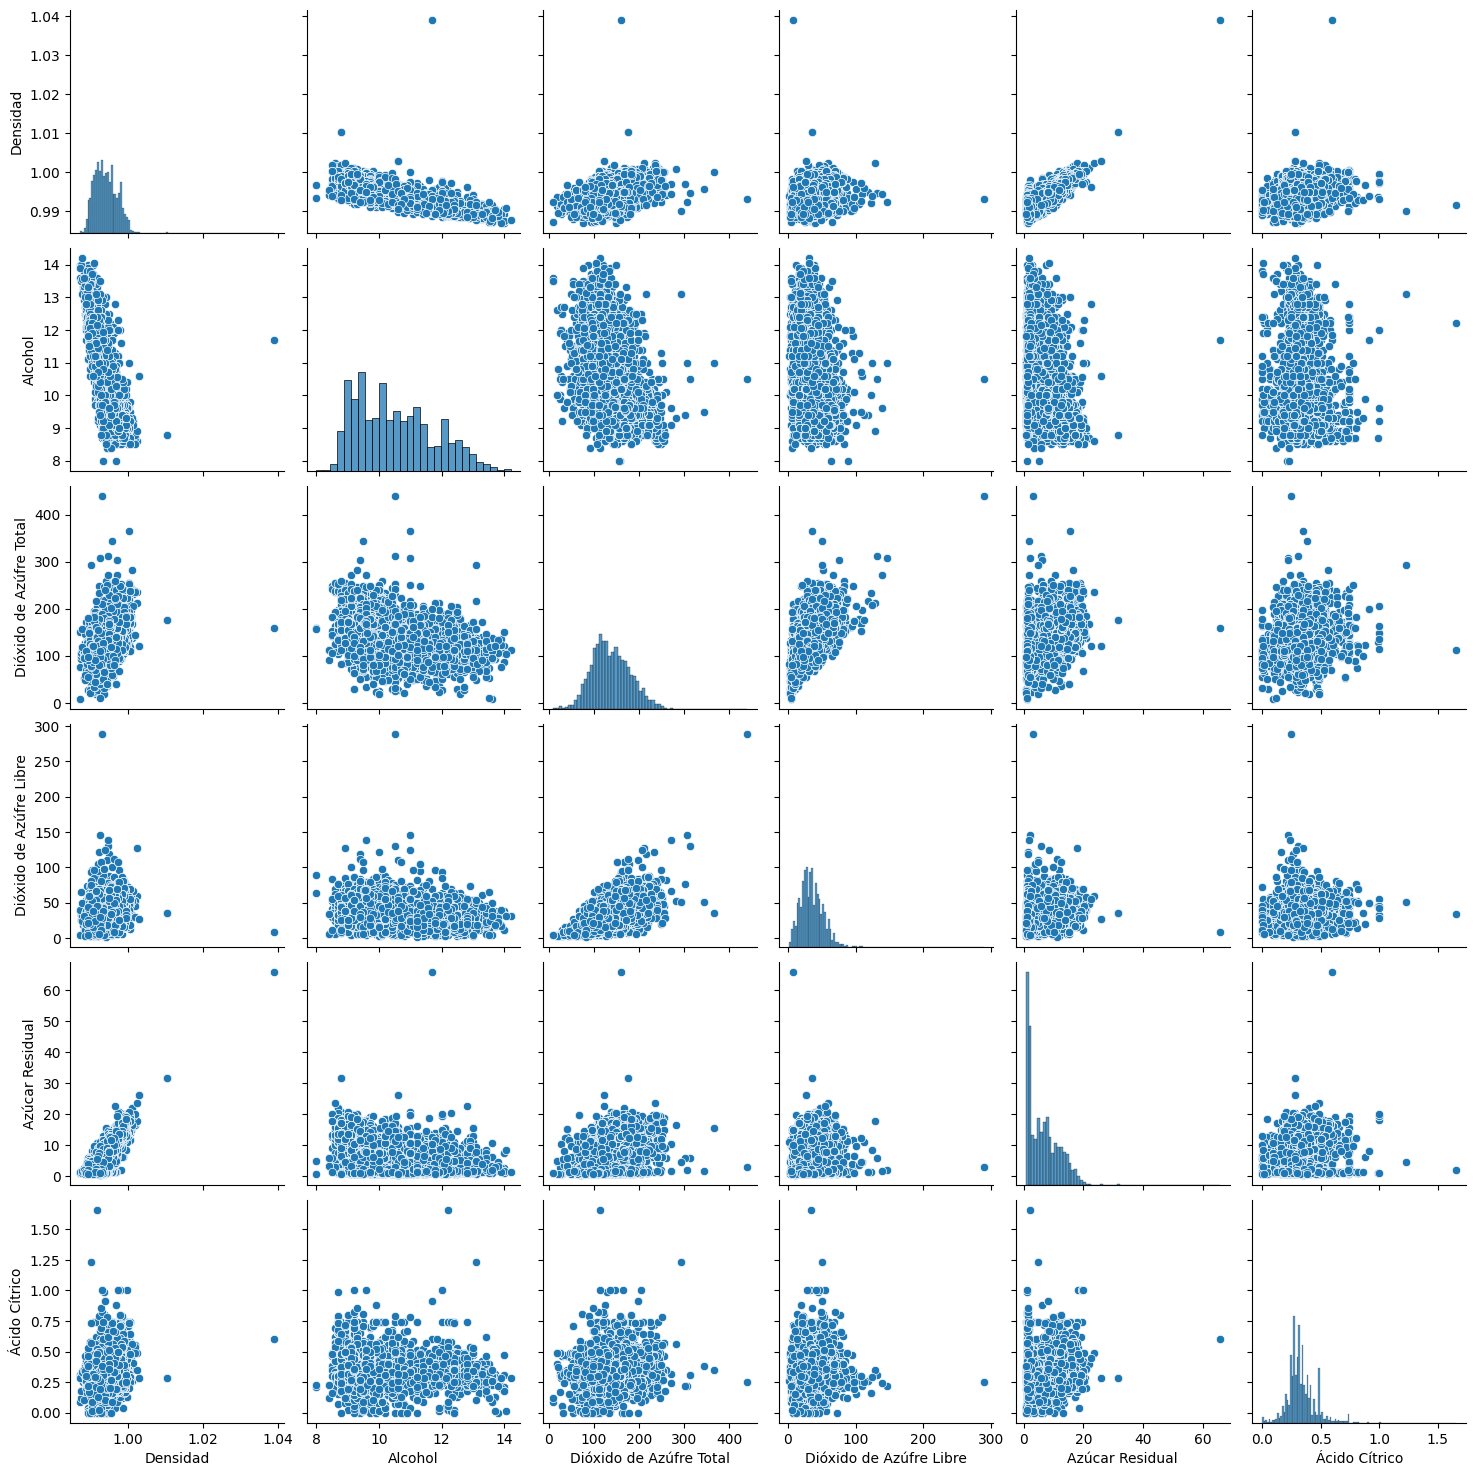

In [13]:
#Verifico como son sus distribuciones y la interaccion entre las mismas
sns.pairplot(df)
plt.show()

Se evidencia que las variables tienende a tener una distribucion normal con sesgo a la derecha, de igual forma se puede notar que las variables predictoras estan en una escala diferente a la variable objetivo, en este caso la densidad

Teniendo encuenta demas que se va a implementar modelo de regresion lineal para este taller se procede a implementar la estandarizacion con StadardScaler de la libreria Sklearn

In [12]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df.head(10)

,Densidad,Alcohol,Dióxido de Azúfre Total,Dióxido de Azúfre Libre,Azúcar Residual,Ácido Cítrico
0,2.331512,-1.393152,0.744565,0.569932,2.821349,0.213280
1,-0.009154,-0.824276,-0.149685,-1.253019,-0.944765,0.048001
2,0.358665,-0.336667,-0.973336,-0.312141,0.100282,0.543838
3,0.525855,-0.499203,1.121091,0.687541,0.415768,-0.117278
4,0.525855,-0.499203,1.121091,0.687541,0.415768,-0.117278
5,0.358665,-0.336667,-0.973336,-0.312141,0.100282,0.543838
6,0.291789,-0.743008,-0.055553,-0.312141,0.120000,-1.439511
7,2.331512,-1.393152,0.744565,0.569932,2.821349,0.213280
8,-0.009154,-0.824276,-0.149685,-1.253019,-0.944765,0.048001
9,-0.076030,0.394746,-0.220283,-0.429751,-0.964483,0.791757


<h4>Matrices de Correlación</h4>

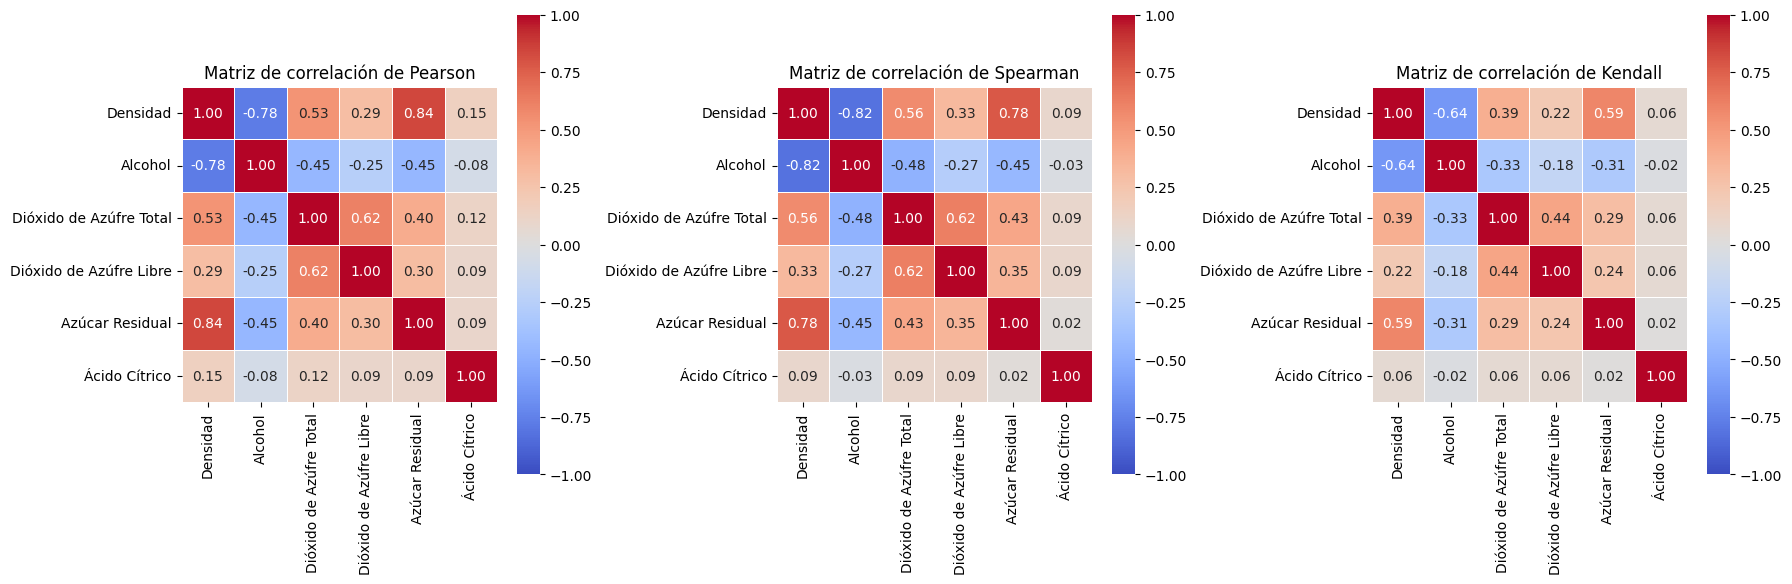

In [26]:
pearson_corr = scaled_df.corr(method='pearson')
kendall_corr = scaled_df.corr(method='kendall')
spearman_corr = scaled_df.corr(method='spearman')

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5, square=True, ax=axes[0])
axes[0].set_title('Matriz de correlación de Pearson')

# Matriz de correlación de Spearman
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5, square=True, ax=axes[1])
axes[1].set_title('Matriz de correlación de Spearman')

# Matriz de correlación de Kendall
sns.heatmap(kendall_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5, square=True, ax=axes[2])
axes[2].set_title('Matriz de correlación de Kendall')

# Ajustar espaciado
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Realice una partición de los datos tipo 80–20, donde el primer 80 % de los datos es
una muestra de entrenamiento y el restante 20 % una muestra de prueba/predicción.
Luego, construya 3 modelos RLM con las matrices estimadas en el primer ítem

. Compare e interprete los valores de los coeficientes de regresión obtenidos por cada método

In [39]:
train_scaled_df, test_scaled_df = train_test_split(scaled_df, test_size=0.2, random_state=42)

print("Conjunto de entrenamiento:")
train_scaled_df


Conjunto de entrenamiento:


,Densidad,Alcohol,Dióxido de Azúfre Total,Dióxido de Azúfre Libre,Azúcar Residual,Ácido Cítrico
4665,-0.437162,1.532500,-0.643875,0.511127,0.356615,0.213280
1943,0.927112,-0.824276,1.332887,0.746346,1.027022,0.874397
3399,-0.450537,0.476014,-1.020401,-0.606165,0.198872,-0.034638
843,-0.293378,0.232210,-0.879204,-0.135727,-0.925047,0.130641
2580,1.916880,-0.092863,0.838697,0.040688,2.476286,-0.613115
...,...,...,...,...,...,...
4426,0.051034,-0.499203,-0.361481,-0.429751,0.021411,1.535513
466,0.525855,-0.905544,0.062111,1.099175,0.514358,-0.117278
3092,-0.915326,0.719818,0.320973,-0.429751,-0.629279,1.535513
3772,0.549262,0.069674,-0.102619,1.040370,1.441098,-0.365197


In [40]:

print("\nConjunto de prueba:")
test_scaled_df


Conjunto de prueba:


,Densidad,Alcohol,Dióxido de Azúfre Total,Dióxido de Azúfre Libre,Azúcar Residual,Ácido Cítrico
4656,-0.109468,0.367657,0.250374,1.157980,0.869279,0.626478
3659,-1.828186,2.182644,-0.243816,-0.076922,-0.727869,-1.439511
907,-1.079173,1.369963,-0.337948,-0.312141,-0.846176,0.461199
4352,-0.751480,0.150942,0.226842,-0.253336,-0.944765,0.130641
3271,-0.731417,1.207427,-1.114533,-0.488556,-0.136332,0.048001
...,...,...,...,...,...,...
3207,-0.564226,0.313478,-0.290882,-0.664970,-1.023637,0.709117
1539,-0.142907,0.232210,-0.738007,-0.194531,-0.274357,1.287594
964,1.060865,-0.824276,0.320973,0.040688,1.204483,-1.026313
168,0.927112,-0.986812,0.297440,-0.900190,0.504499,-0.199917


Modelo de regresion multiple (RLM)

MODELO 1

In [57]:
X = sm.add_constant(train_scaled_df.drop(['Densidad','Dióxido de Azúfre Libre', 'Ácido Cítrico'], axis = 1))
Densidad = train_scaled_df["Densidad"]
model = sm.OLS(Densidad, X)
results1 = model.fit()

print(results1.summary())


                            OLS Regression Results                            
Dep. Variable:               Densidad   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                 1.297e+04
Date:                Sat, 28 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:12:57   Log-Likelihood:                -911.90
No. Observations:                3918   AIC:                             1832.
Df Residuals:                    3914   BIC:                             1857.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

MODELO 2

In [58]:
X2 = sm.add_constant(train_scaled_df.drop(['Densidad','Dióxido de Azúfre Libre', 'Ácido Cítrico', 'Dióxido de Azúfre Total', 'Alcohol'], axis = 1))
Densidad = train_scaled_df["Densidad"]
model2 = sm.OLS(Densidad, X2)
results2 = model2.fit()

print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:               Densidad   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     9622.
Date:                Sat, 28 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:18:04   Log-Likelihood:                -3169.4
No. Observations:                3918   AIC:                             6343.
Df Residuals:                    3916   BIC:                             6355.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0046      0.009     

MODELO 3

In [59]:
X3 = sm.add_constant(train_scaled_df.drop(['Densidad','Dióxido de Azúfre Libre', 'Ácido Cítrico', 'Dióxido de Azúfre Total','Azúcar Residual'], axis = 1))
Densidad = train_scaled_df["Densidad"]
model3 = sm.OLS(Densidad, X3)
results3 = model3.fit()

print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:               Densidad   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     5873.
Date:                Sat, 28 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:19:56   Log-Likelihood:                -3804.6
No. Observations:                3918   AIC:                             7613.
Df Residuals:                    3916   BIC:                             7626.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0110      0.010      1.078      0.2